# Описание 

Первая задача - бинарная классификация примет ли клиент предложение маркетинговой компании - Response 

Вторая задача - Предсказать цену дома 

## Логистическая регрессия - классификатор 

### EDA + feature engineering

In [72]:
import pandas as pd 

df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [14]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Посмотрим на распределение целевой переменной

In [13]:
df['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

Видим что классы достаточно сильно несбилансирвоаны, но будем работать с тем что есть 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [18]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


посмотрим пропуски 

In [19]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Заполним пропуски медианным значением 

In [73]:
median = df["Income"].median()
df["Income"] = df["Income"].fillna(median)

Далее создадим колонки возраста клиента и его стажа 

In [74]:
df['Age'] = 2014 - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
max_date = df['Dt_Customer'].max()
df['Customer_Tenure'] = (max_date - df['Dt_Customer']).dt.days


Импортируем нужные библиотеки 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Далее посмотрим на гистограммы числовых признаков

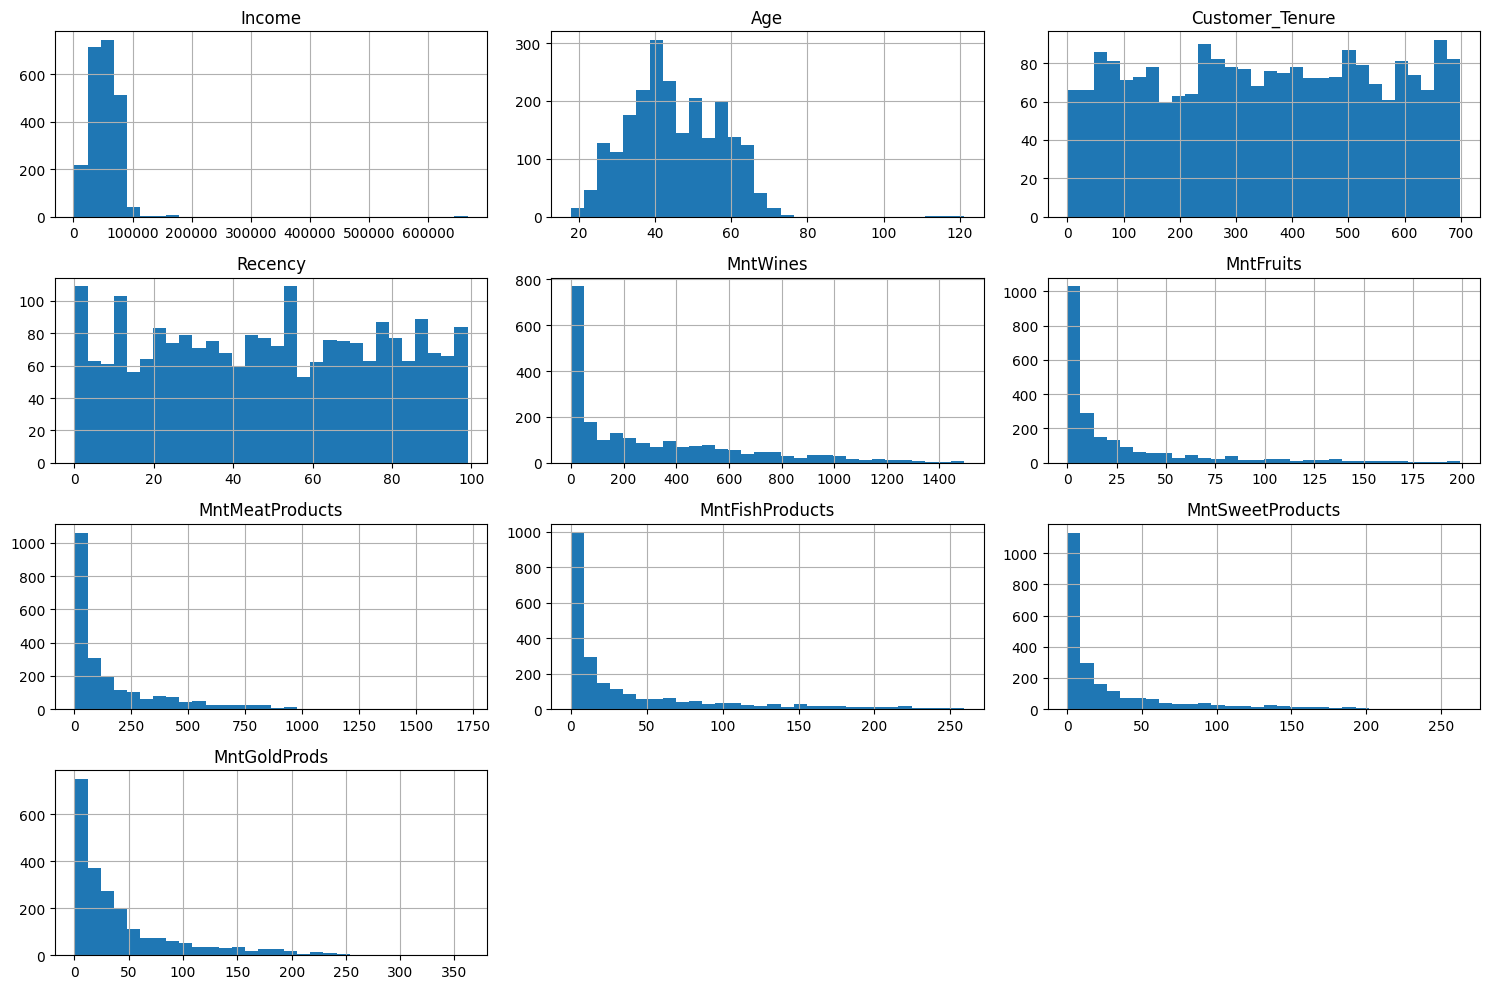

In [5]:
num_cols = [
    "Income", "Age", "Customer_Tenure", "Recency",
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

df[num_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


Теперь поищем выбросы 

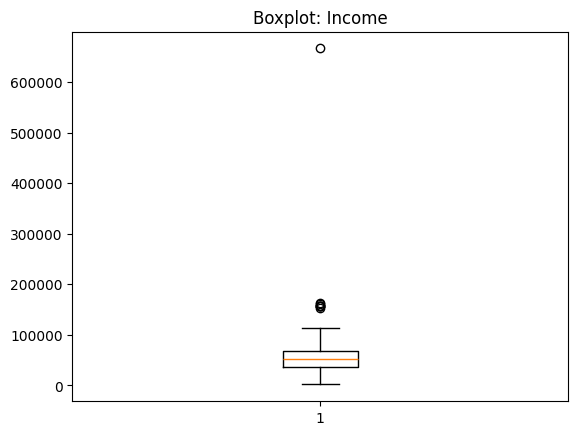

In [26]:
plt.boxplot(df['Income'])
plt.title("Boxplot: Income")
plt.show()


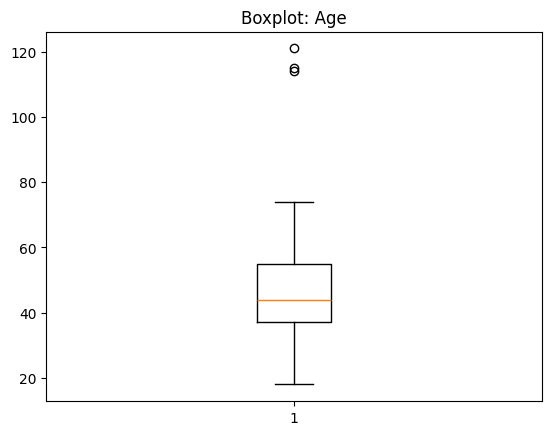

In [27]:
plt.boxplot(df['Age'])
plt.title("Boxplot: Age")
plt.show()


/var/folders/sy/bq09pg_j1599sryhztwt0p880000gn/T/ipykernel_25520/2636918815.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col] for col in money_cols], labels=money_cols)


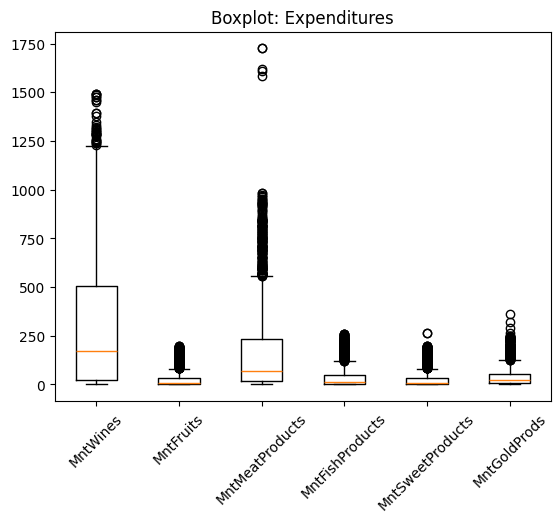

In [75]:
money_cols = [
    "MntWines", "MntFruits", "MntMeatProducts", 
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

plt.boxplot([df[col] for col in money_cols], labels=money_cols)
plt.xticks(rotation=45)
plt.title("Boxplot: Expenditures")
plt.show()


С возрастом явно выброс, клиент не может быть по логике старше 100 лет и поскольку данных у нас немного, применим винзоризвацию

Всё, что ниже 1-го перцентиля (1%), заменяется на значение 1-го перцентиля.

Всё, что выше 99-го перцентиля (99%), заменяется на значение 99-го перцентиля.


In [76]:
def winsorize(df, cols, q_low=0.01, q_high=0.99):
    for col in cols:
        low, high = df[col].quantile([q_low, q_high])
        df[col] = df[col].clip(lower=low, upper=high)
    return df

df = winsorize(df, ["Income", "Age"] + money_cols)


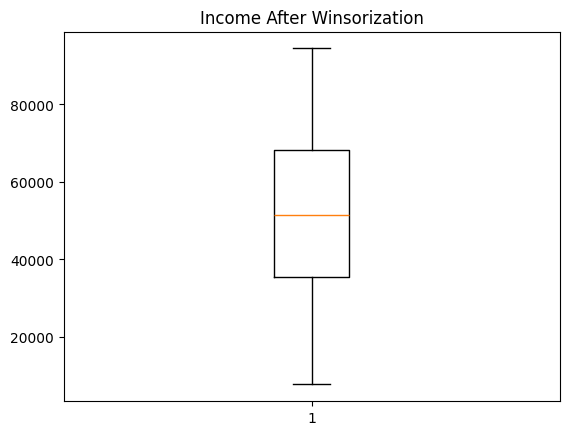

In [30]:
plt.boxplot(df['Income'])
plt.title("Income After Winsorization")
plt.show()


/var/folders/sy/bq09pg_j1599sryhztwt0p880000gn/T/ipykernel_25035/454583793.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col] for col in money_cols], labels=money_cols)


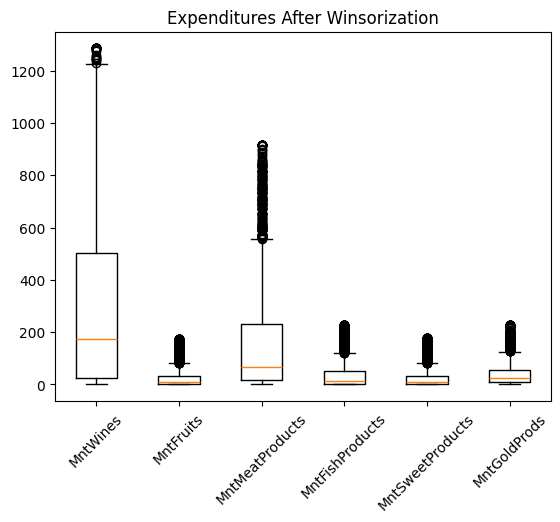

In [31]:
plt.boxplot([df[col] for col in money_cols], labels=money_cols)
plt.xticks(rotation=45)
plt.title("Expenditures After Winsorization")
plt.show()


Видим что теперь данная проблема исправлена

посмотрим на корреляционную матрицу 

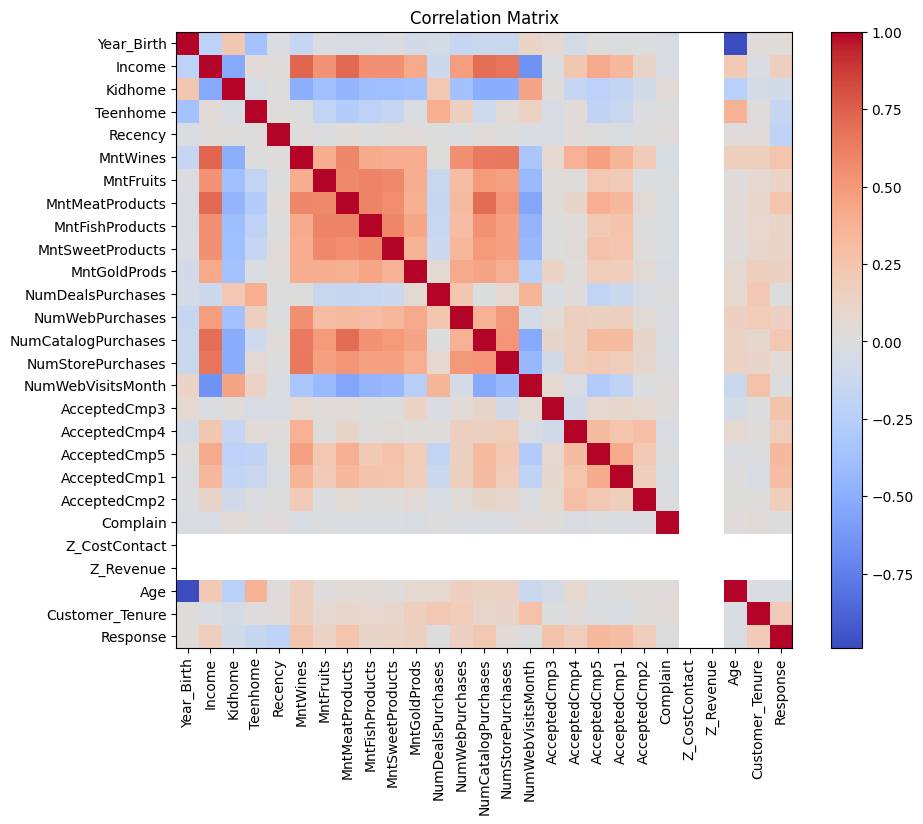

In [77]:
corr = df[num_cols + ["Response"]].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()


Теперь посмотрим на распределение классов по фичам

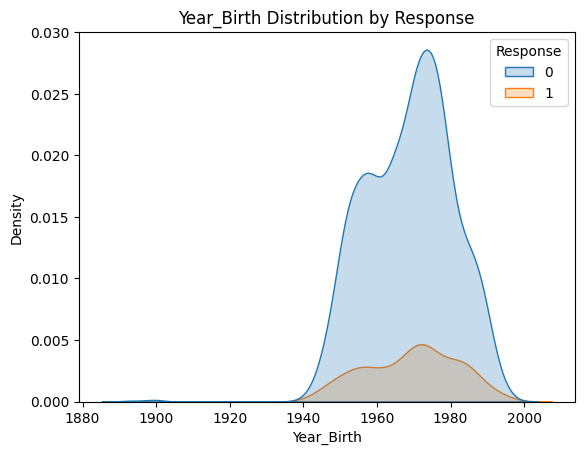

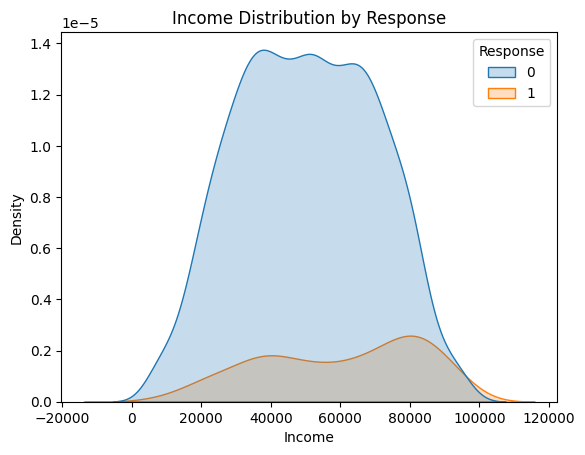

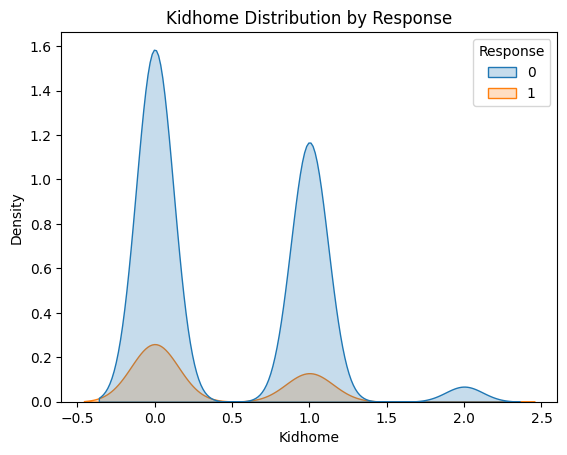

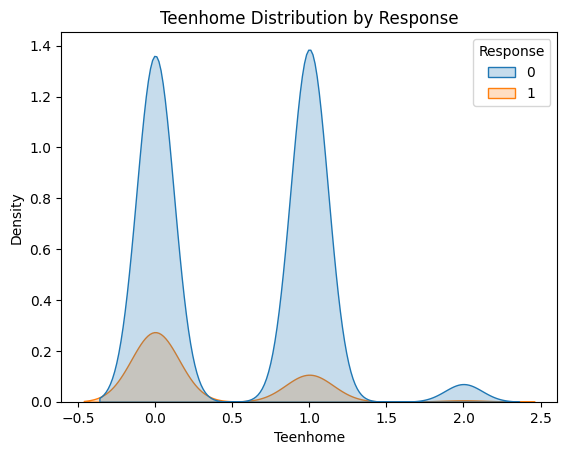

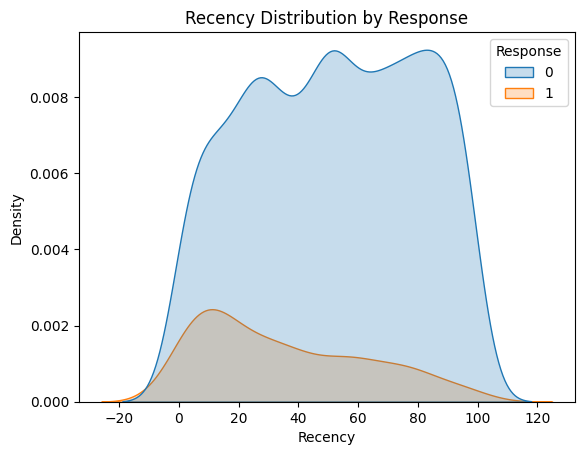

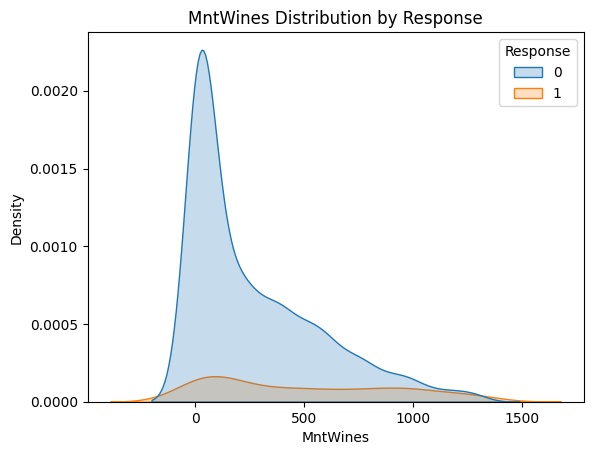

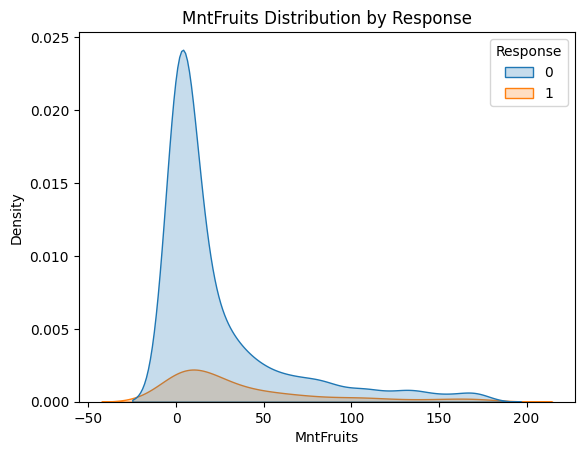

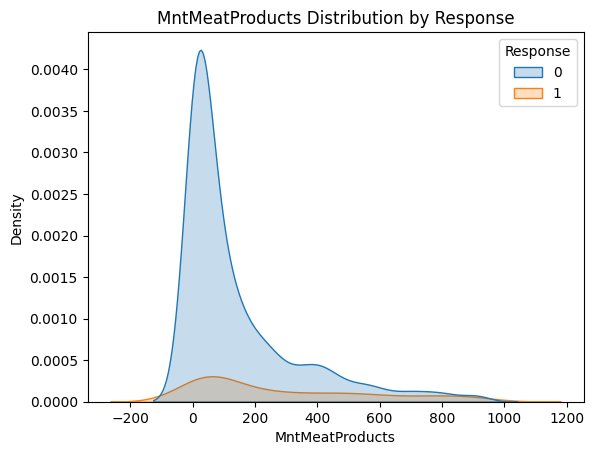

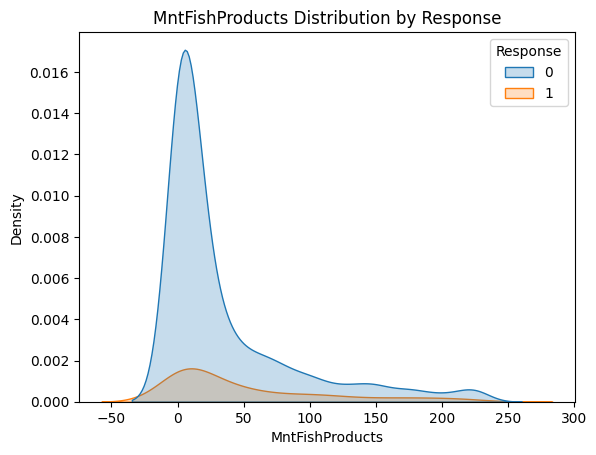

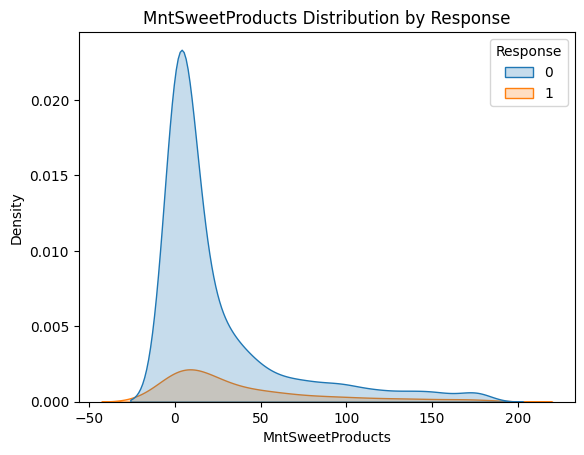

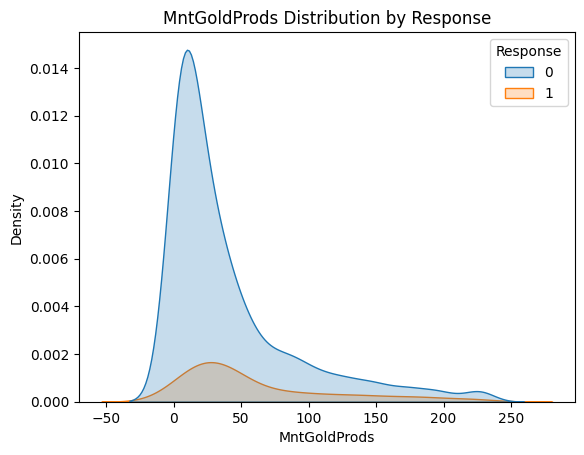

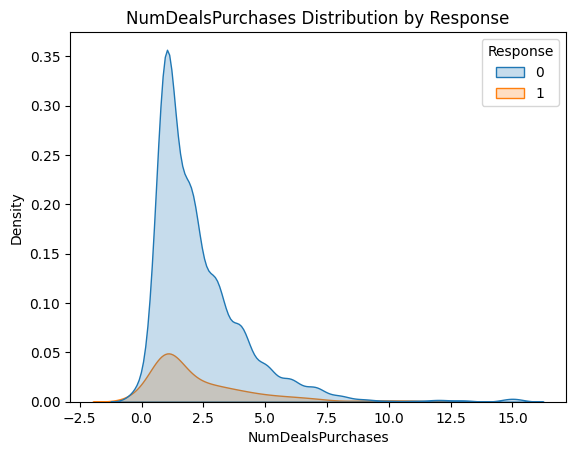

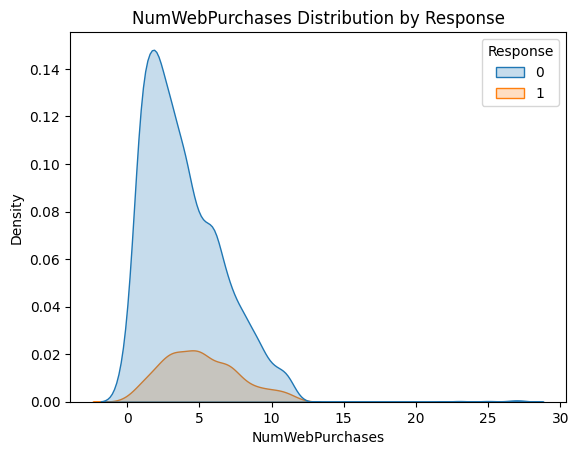

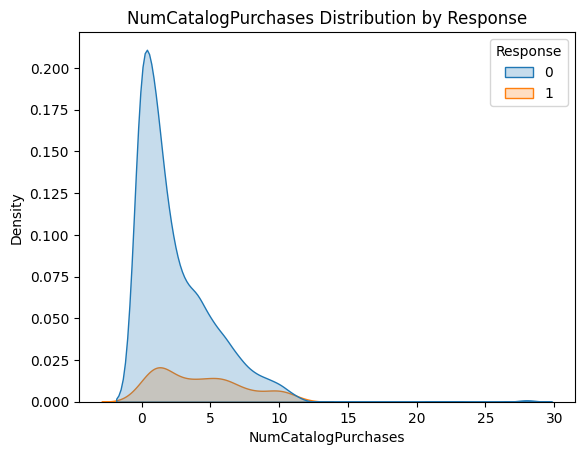

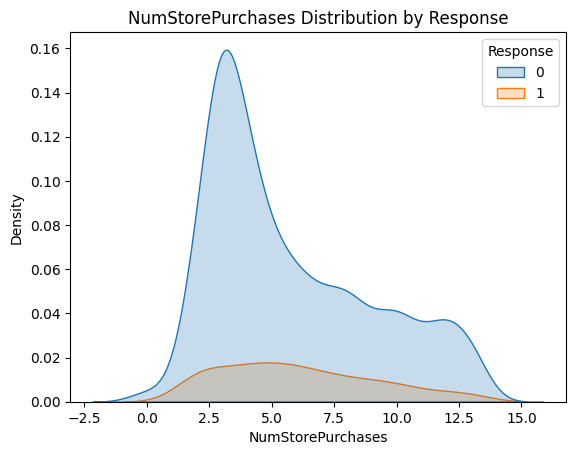

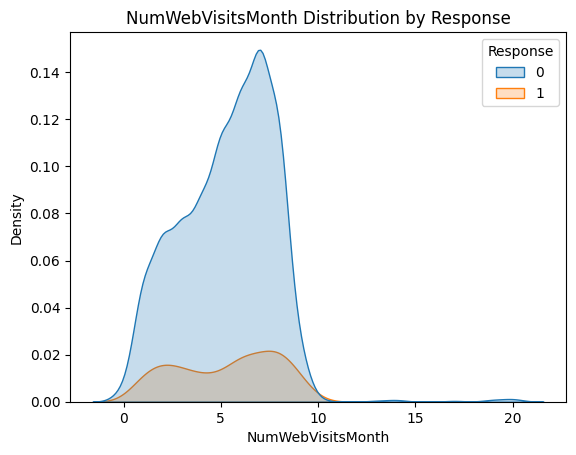

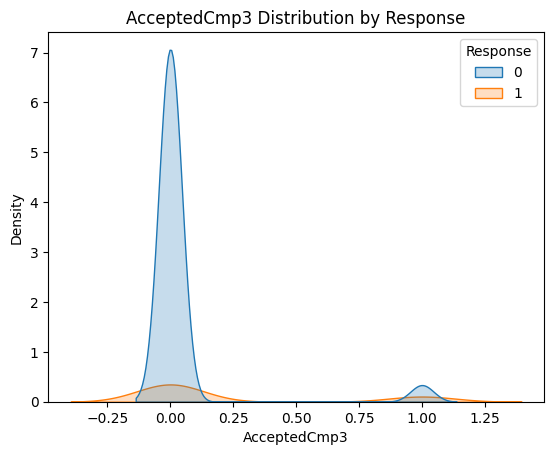

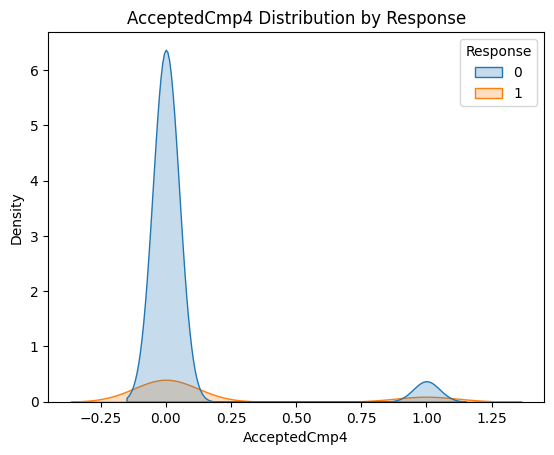

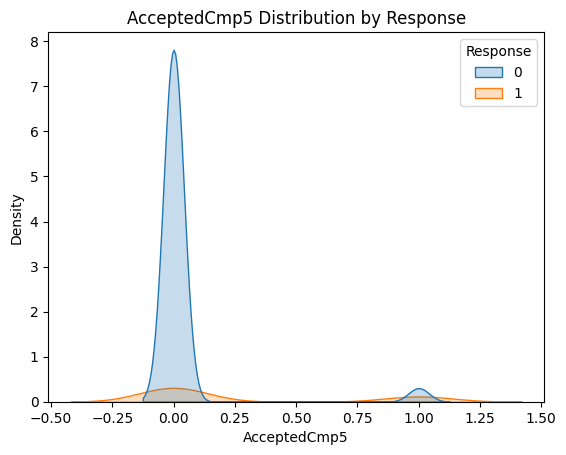

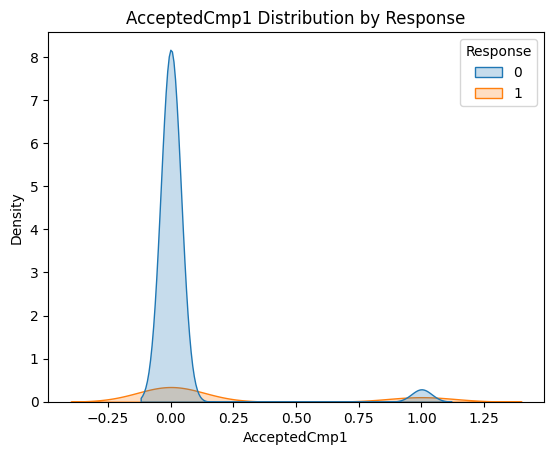

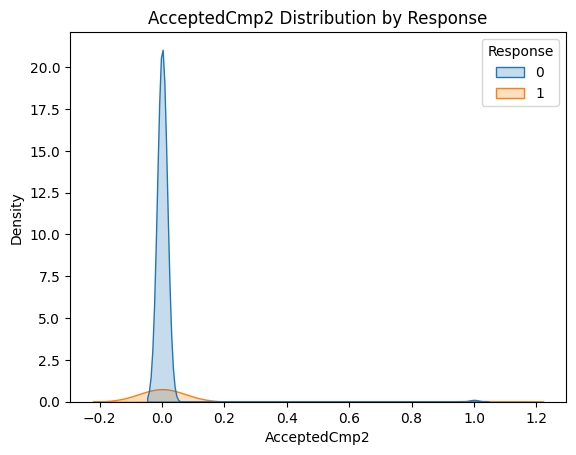

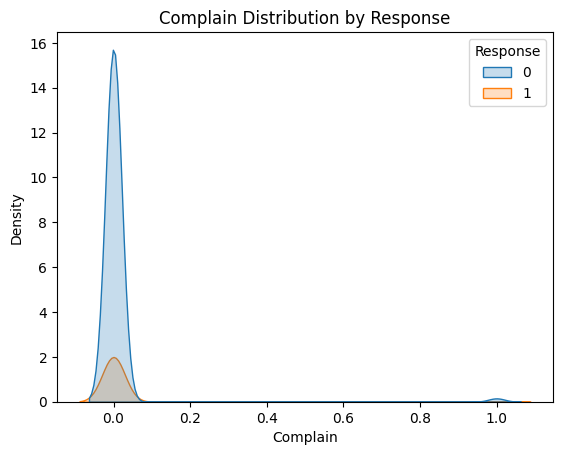

/var/folders/sy/bq09pg_j1599sryhztwt0p880000gn/T/ipykernel_25520/2947165615.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="Response", fill=True)


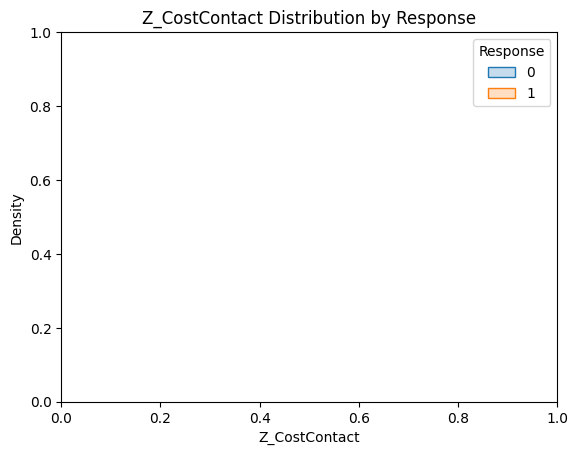

/var/folders/sy/bq09pg_j1599sryhztwt0p880000gn/T/ipykernel_25520/2947165615.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue="Response", fill=True)


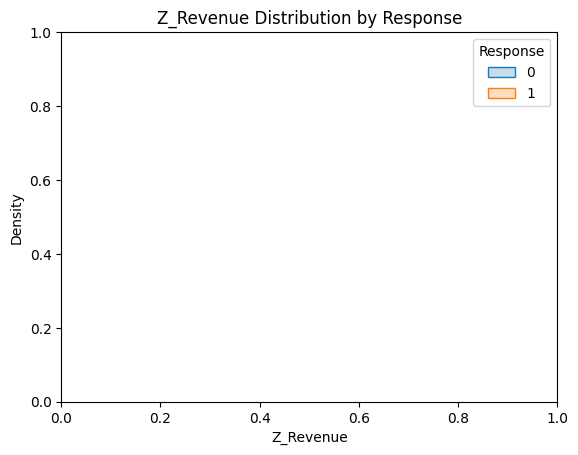

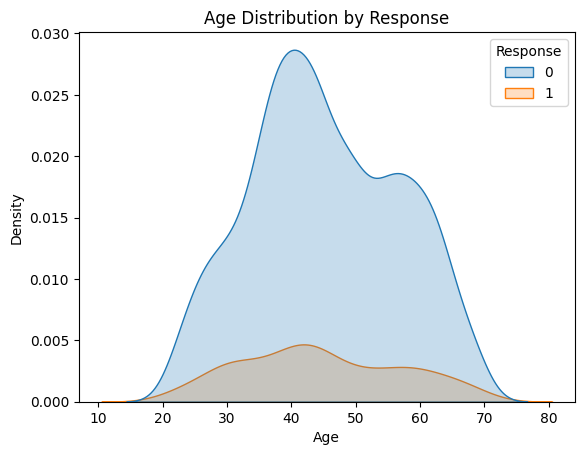

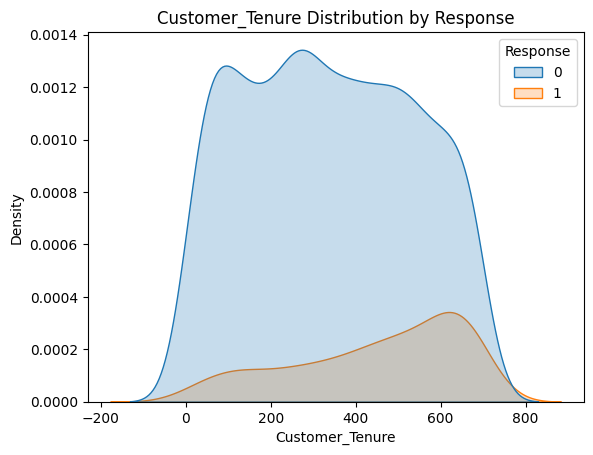

In [78]:
import seaborn as sns

for col in num_cols:
    sns.kdeplot(data=df, x=col, hue="Response", fill=True)
    plt.title(f"{col} Distribution by Response")
    plt.show()


Картина выглядит равномерно и адеватно 

Далее закодируем категориальные фичи

По поводу статуса женитьбы, нам важна только бинарная метка, следовательно уберем странные кейсы 

In [35]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [79]:
df['Marital_Status'] = df['Marital_Status'].replace({
    "YOLO": "Other",
    "Absurd": "Other",
    "Alone": "Other"
})


In [10]:
df.select_dtypes(include=object)

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


Видим что у нас всего 2 категориальных признака, закодируем их с помощью one-hot и далее будем строить baseline 

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

cat_cols = ["Education", "Marital_Status"]
num_cols = [col for col in df.columns 
           if col not in cat_cols + ["Response", "ID", "Dt_Customer"]]

X = df[cat_cols + num_cols]
y = df["Response"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols)
    ]
)



### Baseline

В качестве baseline возьмем логрег с параметрами по умолчанию а признаки масштабируем через standartscaler

In [81]:
clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression())
])


In [82]:

clf.fit(X_train, y_train)
predict = clf.predict(X_test)
predict_proba = clf.predict_proba(X_test)[:, 1]

Будем видеть общую картину по метрикам, но в первую очередь опираться на комбинацию roc-auc(чтобы модель могла различать сильно несбалансированные классы) и f1(чтобы смотреть на баланс precision + recall )

Ожидаем что precision + recall будут невысокие(сильный дисбаланс), но главное чтобы roc-auc был неплохой и далее будем повышать f1

С точки зрения бизнеса - это компромисс между тем, чтобы не рассылать лишнее, и не потерять потенциально ценных клиентов

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def print_classification_metrics(y_true, y_pred, y_proba=None):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")

    if y_proba is not None:
        roc_auc = roc_auc_score(y_true, y_proba)
        print(f"ROC-AUC:   {roc_auc:.4f}")


In [16]:
print_classification_metrics(y_test, predict, predict_proba)

Precision: 0.6780
Recall:    0.4819
F1-score:  0.5634
ROC-AUC:   0.8974


Зафиксируем метрики 

Теперь подберем гиперпараметры для логистической регрессии

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__penalty": ["l1", "l2", "elasticnet", None],
    "model__C": [0.001, 0.01, 0.1, 1, 5, 10, 50],
    "model__solver": ["liblinear", "saga"],  
    "model__l1_ratio": [0, 0.3, 0.5, 0.7, 1]  
}
grid_search = GridSearchCV(
    clf,
    param_grid=param_grid,
    cv=5,
    scoring="f1",   
    n_jobs=-1,
    verbose=False
)

grid_search.fit(X_train, y_train)



In [19]:
print_classification_metrics(y_test, grid_search.predict(X_test), grid_search.predict_proba(X_test)[:, 1])

Precision: 0.6897
Recall:    0.4819
F1-score:  0.5674
ROC-AUC:   0.8979


Получилcя весьма неплохой roc-auc для такого распределения и получилось слегка улучшить f1

Теперь попробуем использовать smote, добавим в нашу выборку примеров положительного класса, а затем заного подберем гиперпарметры, это должно существенно улучшить метрики

Поскольку нам важнее не потерять потениальных клиентов, нужно повысить recall, еще один плюс в сторону smote

Импортируем ImbPipeline, поскольку pipeline из sklearn не умеет работать с smote

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression())
])

param_grid = {
    "model__penalty": ["l1", "l2", "elasticnet", None],
    "model__C": [0.001, 0.01, 0.1, 1, 5, 10, 50],
    "model__solver": ["liblinear", "saga"],  
    "model__l1_ratio": [0, 0.3, 0.5, 0.7, 1]  
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=False
)

grid.fit(X_train, y_train)

print("Лучшие параметры:")
print(grid.best_params_)

best_model = grid.best_estimator_


In [23]:
print_classification_metrics(y_test, grid.predict(X_test), grid.predict_proba(X_test)[:, 1])

Precision: 0.4357
Recall:    0.7349
F1-score:  0.5471
ROC-AUC:   0.8974


In [28]:
grid.best_params_

{'model__C': 0.1,
 'model__l1_ratio': 0.3,
 'model__penalty': 'elasticnet',
 'model__solver': 'saga'}

Видим что наша гипотеза подтвердилась, правда precision просел, но такова и была задумка, при этом видим улучшение по сравнению с knn в прошлой лабораторной работе 

### Собственная имплиментация логистической регрессии

In [83]:
import numpy as np

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000, lambda_=0.0):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.lambda_ = lambda_
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)

        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for _ in range(self.n_iters):
            linear_output = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_output)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + (self.lambda_ / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        return self

    def predict_proba(self, X):
        X = np.asarray(X, dtype=float)
        linear_output = np.dot(X, self.weights) + self.bias
        probs_pos = self._sigmoid(linear_output)
        probs_neg = 1 - probs_pos

        return np.vstack([probs_neg, probs_pos]).T

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        return (proba >= 0.5).astype(int)


для начала посмотрим на метрики 

In [84]:
clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", MyLogisticRegression())
])


clf.fit(X_train, y_train)
predict = clf.predict(X_test)
predict_proba = clf.predict_proba(X_test)[:, 1]



In [85]:
print_classification_metrics(y_test, predict, predict_proba)

Precision: 0.7838
Recall:    0.3494
F1-score:  0.4833
ROC-AUC:   0.8916


получили практически идентичные метрики как и на реализации из sklearn, посмотрим на финал 

In [86]:

# params = {'C': 0.1,
#  'l1_ratio': 0.3,
#  'penalty': 'elasticnet',
#  'solver': 'saga'
#  }

pipeline = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("model", MyLogisticRegression(learning_rate=0.01,     
    n_iters=3000,            
    lambda_=10))
])

pipeline.fit(X_train, y_train)
predict = pipeline.predict(X_test)
predict_proba = pipeline.predict_proba(X_test)[:, 1]



In [30]:
print_classification_metrics(y_test, predict, predict_proba)

Precision: 0.4357
Recall:    0.7349
F1-score:  0.5471
ROC-AUC:   0.8974


Видим идентичный результат 

## логистическая регрессия 

### EDA + FEATURE ENGENNERING

In [31]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [73]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [74]:
df.shape

(1460, 81)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [32]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Теперь обработаем пропуски 

Категориальные заполним на none, числовые на 0, LotFrontage(длина участка вдоль улицы) заполним медианой по району. Electrical заполним модой 

In [33]:
none_cat = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType",
    "FireplaceQu",
    "GarageType", "GarageFinish", "GarageQual", "GarageCond",
    "BsmtFinType1", "BsmtFinType2", "BsmtExposure", "BsmtCond", "BsmtQual"
]

for col in none_cat:
    df[col] = df[col].fillna("None")


none_num = ["GarageYrBlt", "MasVnrArea"]

for col in none_num:
    df[col] = df[col].fillna(0)


df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)


df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])


Теперь проведем eda 

Посмотрим распределение целевой переменной 

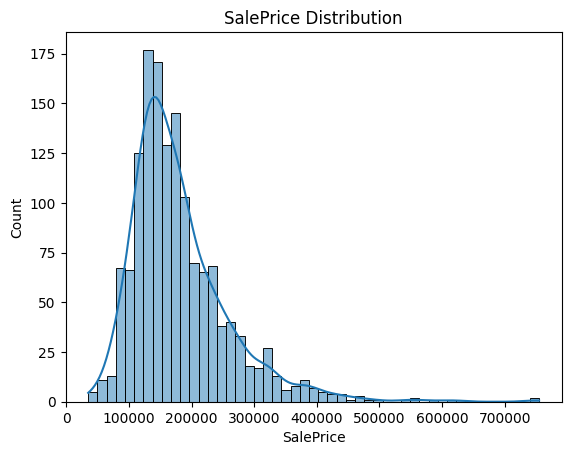

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["SalePrice"], kde=True)
plt.title("SalePrice Distribution")
plt.show()


Скорректируем распределение целевой переменной, логарифмируя получим практически нормальное распределение 

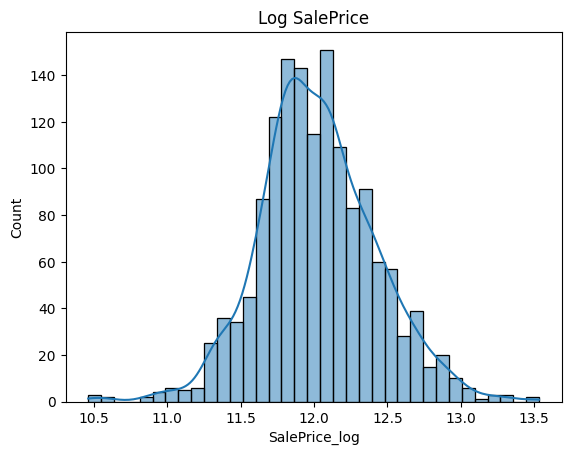

In [35]:
df["SalePrice_log"] = np.log1p(df["SalePrice"])

sns.histplot(df["SalePrice_log"], kde=True)
plt.title("Log SalePrice")
plt.show()


Теперь посморим на корреляцию 

In [36]:
import numpy as np 

numeric = df.select_dtypes(include=[np.number])

corr = numeric.corr()["SalePrice"].sort_values(ascending=False)
corr.head(20)


SalePrice        1.000000
SalePrice_log    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.349876
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
Name: SalePrice, dtype: float64

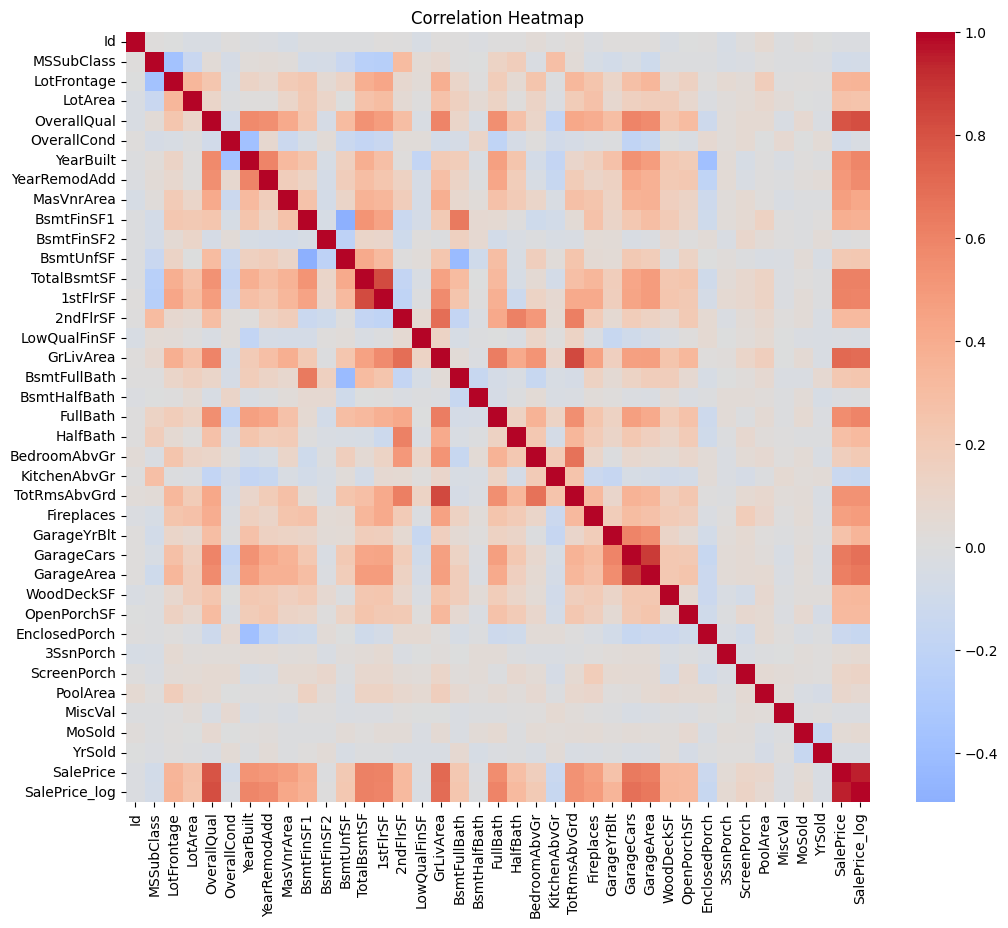

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(numeric.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


Видим что по общему количеству есть много интересных фичей, ничего удалять не будем 

Обработаем выбросы 

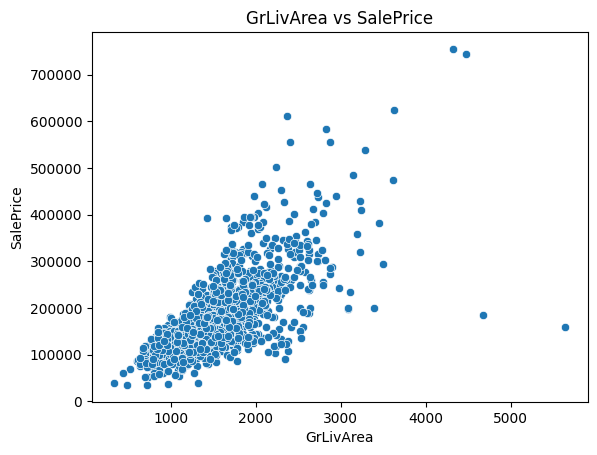

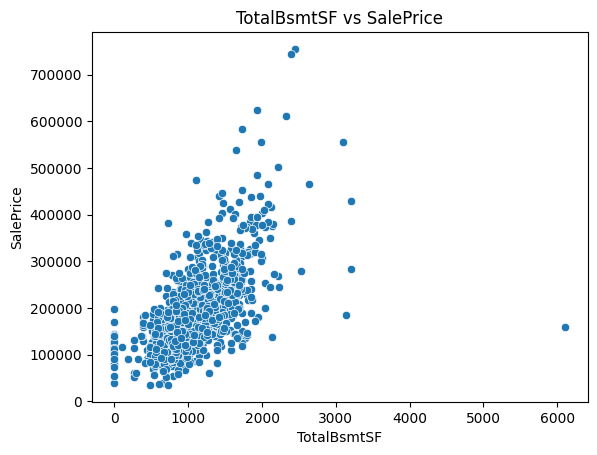

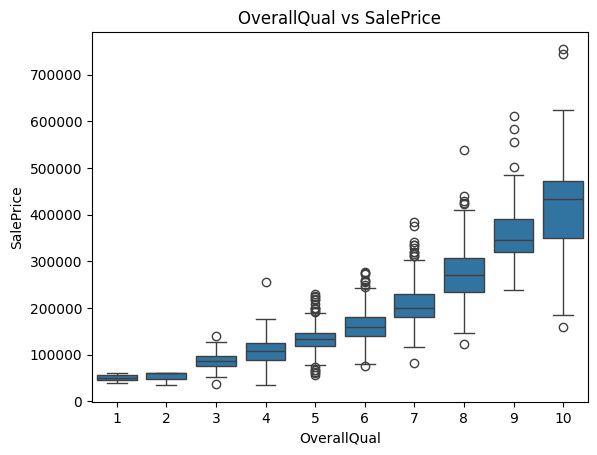

In [38]:
import seaborn as sns 

sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"])
plt.title("GrLivArea vs SalePrice")
plt.show()

sns.scatterplot(x=df["TotalBsmtSF"], y=df["SalePrice"])
plt.title("TotalBsmtSF vs SalePrice")
plt.show()

sns.boxplot(x=df["OverallQual"], y=df["SalePrice"])
plt.title("OverallQual vs SalePrice")
plt.show()


In [39]:
df = df[df["GrLivArea"] < 4000]
df = df[df["TotalBsmtSF"] < 4000]


Площадь явно бросается в глаза, а также площидь подвала, удалим такие выбросы 

In [40]:
df = df[~((df["GrLivArea"] > 4000) & (df["SalePrice"] < 300000))]


Удаляем дома, у которых огромная жилая площадь (> 4000), но при этом подозрительно низкая цена (< 300 000)

#### Feature Engineering

Добавим несколько признаков с площадями, они могут нам помочь 

In [41]:
df["TotalSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
df["TotalPorchSF"] = (
    df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]
)


Добавим также фичи с возрастом дома и возрастом его последнего ремонта 


In [42]:
df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
df["RemodAge"] = df["YrSold"] - df["YearRemodAdd"]


Добавим категорию качества

In [43]:
df["QualCat"] = pd.cut(
    df["OverallQual"],
    bins=[0,4,7,10],
    labels=["Low","Medium","High"]
)


#### Baseline

Закодируем с помощью one-hot, единственная ремарка, на предикты будем применять обратную операцию так как мы логарифмировали целевую переменную, чтобы сделать распределение более нормальным 

В качестве baseline возьмем линейную регрессию с параметрами по умолчанию и standart scaler

In [44]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns

df_model = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [45]:
y = df_model["SalePrice_log"]
X = df_model.drop(columns=["SalePrice", "SalePrice_log"])


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42
)


В качестве метрик будем смотреть на rmse, r2 и mae 


rmse поскольку штрафует большие ошибки, это то что нам надо, так как цены могут иметь разный порядок. 

r2 чтобы следить какой % разброса таргета обьясняет модель

mae для наглядности(средняя ошибка в долларах)


Если переводить на бизнес-язык: 

RMSE	точность в абсолютных деньгах	

MAE	однозначное понимание среднего отклонения, удобно для бизнеса и заказчика

r2	- то насколько наша модель лучше среднего 


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_regression_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R²:   {r2:.4f}")
    


In [48]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing


Series([], dtype: int64)

In [55]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lin_reg_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

lin_reg_pipe.fit(X_train, y_train)



,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [53]:
y_pred_log = lin_reg_pipe.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

print_regression_metrics(y_true, y_pred)


RMSE: 22255.3127
MAE:  15404.1081
R²:   0.9011


Наша стартовая точка, видим улучшения по сравнению с knn 

Теперь подберем гиперпараметры, ,будем использовать elsaticnet чтобы найти баланас между l1 и l2

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 5, 10],
    "model__l1_ratio": [0, 0.2, 0.5, 0.8, 1], 
}

lin_reg_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", ElasticNet())
])

grid = GridSearchCV(
    estimator=lin_reg_pipe,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=False
)

grid.fit(X_train, y_train)



In [58]:
print("Лучшие параметры:")
print(grid.best_params_)


Лучшие параметры:
{'model__alpha': 0.01, 'model__l1_ratio': 0.5}


In [59]:
best_lr= grid.best_estimator_

y_pred_log = best_lr.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

metrics = print_regression_metrics(y_true, y_pred)


RMSE: 19297.4616
MAE:  13838.7949
R²:   0.9257


Неплохой результат для простой линейной регрессии, в среднем ошибаемся на 19297 доллара, что не так плохо + метрики стали лучше по сравнению с knn 

### Собственная имплементация линейной регрессии

In [60]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class MyElasticNetRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, alpha=1.0, l1_ratio=0.5, learning_rate=0.01, n_iters=1000, fit_intercept=True, random_state=None):
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.fit_intercept = fit_intercept
        self.random_state = random_state
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float).ravel()
        n_samples, n_features = X.shape

        if self.random_state is not None:
            np.random.seed(self.random_state)

        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0.0 if self.fit_intercept else 0.0

        for _ in range(self.n_iters):
            y_pred = X @ self.coef_ + (self.intercept_ if self.fit_intercept else 0.0)
            error = y_pred - y

            grad_w = (1.0 / n_samples) * (X.T @ error)
            if self.alpha != 0:
                l2_term = self.alpha * (1.0 - self.l1_ratio) * self.coef_
                l1_term = self.alpha * self.l1_ratio * np.sign(self.coef_)
                grad_w += l2_term + l1_term

            if self.fit_intercept:
                grad_b = (1.0 / n_samples) * np.sum(error)
            else:
                grad_b = 0.0

            self.coef_ -= self.learning_rate * grad_w
            if self.fit_intercept:
                self.intercept_ -= self.learning_rate * grad_b

        return self

    def predict(self, X):
        X = np.asarray(X, dtype=float)
        return X @ self.coef_ + (self.intercept_ if self.fit_intercept else 0.0)


In [64]:
lin_reg = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model",MyElasticNetRegressor())
])

lin_reg.fit(X_train, y_train)
y_pred_log = lin_reg.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

print_regression_metrics(y_true, y_pred)


RMSE: 64664.2047
MAE:  47133.9223
R²:   0.1654


In [67]:
lin_reg = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model",MyElasticNetRegressor(alpha=0.01, l1_ratio=0.5))
])

lin_reg.fit(X_train, y_train)
y_pred_log = lin_reg.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

print_regression_metrics(y_true, y_pred)

RMSE: 19483.8006
MAE:  13944.2353
R²:   0.9242


Получили практически идентичные метрики 